In [10]:
import warnings
warnings.filterwarnings('ignore')


import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  


# Prepare Data

In [11]:
data = np.random.randn(500, 2)
data[0]
data[0,0]
#samirwagle

0.5572528919481532

In [12]:
theta = np.zeros(2)


In [13]:
theta

array([0., 0.])

# Loss Function

In [14]:
def loss_function(data,theta):
    
    #get m and b
    m = theta[0]
    b = theta[1]
    
    loss = 0
    
    #on each data point 
    for i in range(0, len(data)):
        
        #get x and y
        x = data[i, 0]
        y = data[i, 1]
        
        #predict the value of y 
        y_hat = (m*x + b)
        
        #compute loss as given in quation (2)
        loss = loss + ((y - (y_hat)) ** 2)
        
    #mean sqaured loss
    mean_squared_loss = loss / float(len(data))
        
    return mean_squared_loss

# Calling the Loss Function

In [15]:
loss_function(data, theta)

0.9814444104554407

# Gradient of Loss Function

In [16]:
def compute_gradients(data, theta):

    gradients = np.zeros(2)
    
    #total number of data points
    N = float(len(data))
    
    m = theta[0]
    b = theta[1]
    
    #for each data point
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
           
        #gradient of loss function with respect to m as given in (3)
        gradients[0] += - (2 / N) * x * (y - (( m* x) + b))
        
        #gradient of loss funcction with respect to b as given in (4)
        gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b))
    
    #add epsilon to avoid division by zero error
    epsilon = 1e-6 
    gradients = np.divide(gradients, N + epsilon)

    return gradients

# Calculating the Gradient


In [17]:
compute_gradients(data,theta)

array([-1.78190172e-04, -6.63299036e-05])

# Update Rule


In [18]:
num_iterations = 50000
lr = 1e-2 #learning rate
loss = [] #list for storing a loss
theta = np.zeros(2)

for t in range(num_iterations):
    
    #compute gradients
    gradients = compute_gradients(data, theta)
    
    #update parameter                                                                                                                                                          Samir Wagle
    theta = theta - (lr*gradients)
    
    #store the loss
    loss.append(loss_function(data,theta))


# Plot

Text(0.5, 1.0, 'Gradient Descent')

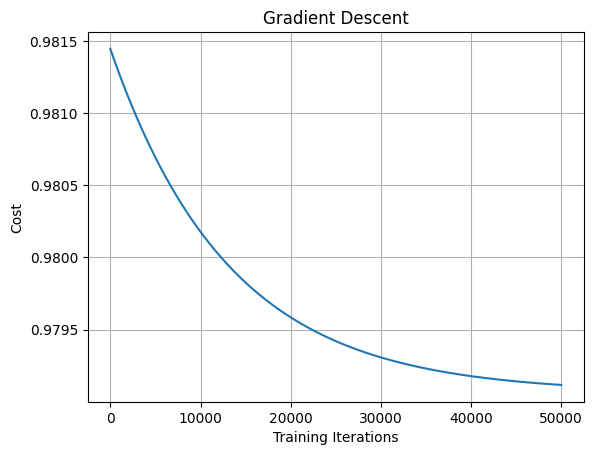

In [19]:
plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')

# Gradient Descent vs Stochastic gradient descent

Minibatch gradient descent


Text(0.5, 1.0, 'Mini-Batch Gradient Descent')

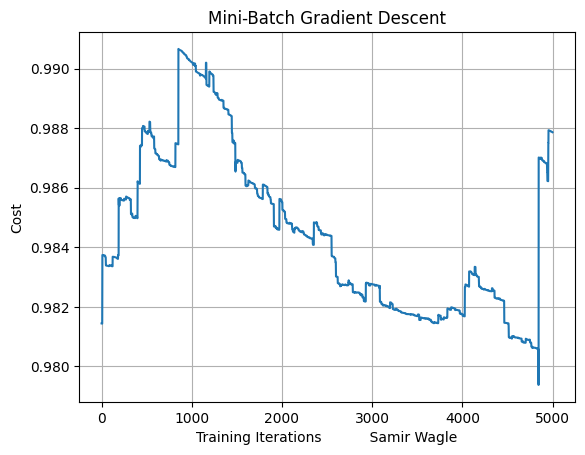

In [21]:
def minibatch(data, theta, lr = 1e-2, minibatch_ratio = 0.01, num_iterations = 5000):
    
    loss = []
    minibatch_size = int(math.ceil(len(data) * minibatch_ratio))
    
    for t in range(num_iterations):
        sample_size = random.sample(range(len(data)), minibatch_size)
        np.random.shuffle(data)
        
        #sample batch of data
        sample_data = data[0:sample_size[0], :]
        
        #compute gradients
        grad = compute_gradients(sample_data, theta)
       
        #update parameters
        theta = theta - (lr * grad)
        
        loss.append(loss_function(data,theta))
            
    return loss
#Perform minibatch gradient descent and compute loss:     

theta = np.zeros(2)
loss = minibatch(data, theta)
#Plot the loss:

plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations           Samir Wagle')
plt.ylabel('Cost')

plt.title('Mini-Batch Gradient Descent')

# Momentum Based Gradient Descent

In [22]:
def Momentum(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 5000):
    
    loss = []
    
    #Initialize vt with zeros:
    vt = np.zeros(theta.shape[0])
    
    
    for t in range(num_iterations):
        
        #compute gradients with respect to theta 
        gradients = compute_gradients(data, theta)
        
        #Update vt by equation (8)
        vt = gamma * vt + lr * gradients
        
        #update model parameter theta by equation (9)
        theta = theta - vt
    
        #store loss of every iteration
        loss.append(loss_function(data,theta))
        
    return loss

Text(0.5, 1.0, 'Mometum')

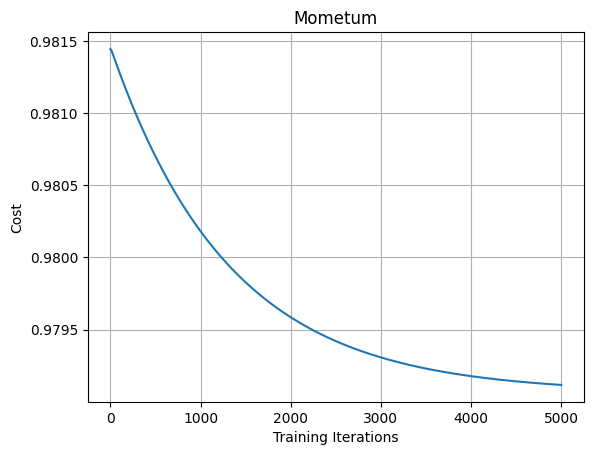

In [23]:
theta = np.zeros(2)
loss = Momentum(data, theta)
# Plot the loss:

plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

plt.title('Mometum')

# NAG


In [26]:
def NAG(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 5000):
    
    loss = []
    
    #Initialize vt with zeros:
    vt = np.zeros(theta.shape[0])
       
    for t in range(num_iterations):
        
        #compute gradients with respet to (theta-gamma*vt-1)
        gradients = compute_gradients(data, theta - gamma * vt)
        
        #update vt by equation (10)
        vt = gamma * vt + lr * gradients
        
        #update model parameter theta by equation (11)
        theta = theta - vt
        
        loss.append(loss_function(data,theta))
        
    return loss

Text(0, 0.5, 'Cost')

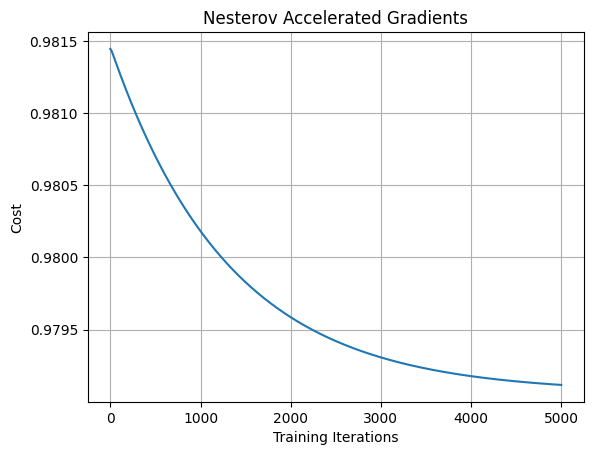

In [27]:
theta = np.zeros(2)
loss = NAG(data, theta) 
# Plot the loss:

plt.plot(loss)
plt.grid()

plt.title('Nesterov Accelerated Gradients')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

# Some of the adaptive measures of gradient descent


# ADGRAD

In [28]:
def AdaGrad(data, theta, lr = 1e-2, epsilon = 1e-8, num_iterations = 100):

    loss = []
    
    #initialize gradients_sum for storing sum of gradients
    gradients_sum = np.zeros(theta.shape[0])

    for t in range(num_iterations):
        
        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)
    
        #compute square of sum of gradients
        gradients_sum += gradients ** 2
    
        #update gradients
        gradient_update = gradients / (np.sqrt(gradients_sum + epsilon))
    
        #update model parameter according to equation (12)
        theta = theta - (lr * gradient_update)

        loss.append(loss_function(data,theta))

    return loss

Text(0, 0.5, 'Cost')

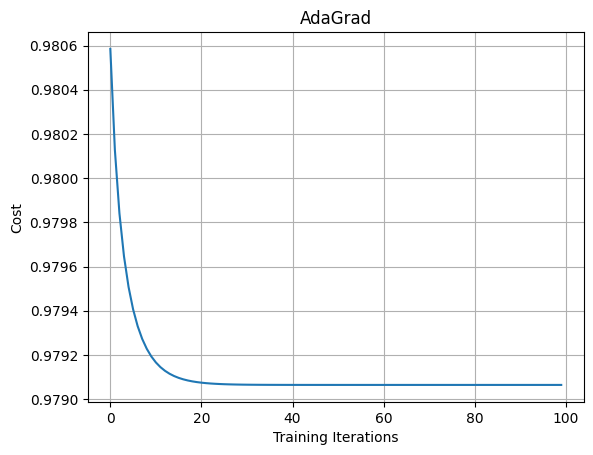

In [30]:

#Update model parameter using AdaGrad and compute loss:

theta = np.zeros(2)
loss = AdaGrad(data, theta) 
# Plot the Loss

plt.plot(loss)
plt.grid()
plt.title('AdaGrad')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

# ADADELTA


In [31]:
def AdaDelta(data, theta, gamma = 0.9, epsilon = 1e-5, num_iterations = 500):
    
    loss = []
    
    #initialize running average of gradients
    E_grad2 = np.zeros(theta.shape[0])
    
    #initialize running average of parameter update
    E_delta_theta2 = np.zeros(theta.shape[0])
    
    
    for t in range(num_iterations):
        
        #compute gradients of loss with respect to theta
        gradients = compute_gradients(data, theta)
        
        #compute running average of gradients as given in equation (13)
        E_grad2 = (gamma * E_grad2) + ((1. - gamma) * (gradients ** 2))
        
        #compute delta_theta as given in equation (14)
        delta_theta = - (np.sqrt(E_delta_theta2 + epsilon)) / (np.sqrt(E_grad2 + epsilon)) * gradients
        
        #compute running average of parameter updates as given in equation (15)
        E_delta_theta2 = (gamma * E_delta_theta2) + ((1. - gamma) * (delta_theta ** 2))
        
        #update the model parameter, theta as given in equation (16)
        theta = theta + delta_theta
        
        #store  the loss
        loss.append(loss_function(data,theta))

    return loss

Text(0, 0.5, 'Cost')

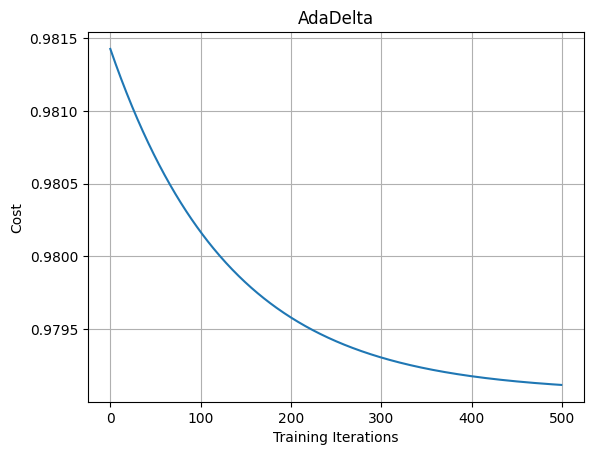

In [32]:
theta = np.zeros(2)
loss = AdaDelta(data, theta) 
#Plot the loss:

plt.plot(loss)
plt.grid()
plt.title('AdaDelta')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

# RMS Prop

In [33]:
def RMSProp(data, theta, lr = 1e-2, gamma = 0.9, epsilon = 1e-6, num_iterations = 100): 
    
    loss= []
    
    #initialize running average of gradients
    E_grad2 = np.zeros(theta.shape[0])
    
    for t in range(num_iterations):
        
        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)
        
        #compute running average of gradients as given in equation (17)
        E_grad2 = (gamma * E_grad2) + ((1. - gamma) * (gradients ** 2))
        
        #update model parameter as given in equation (18)
        theta = theta - (lr / (np.sqrt(E_grad2 + epsilon)) * gradients)
        
        #store the loss
        loss.append(loss_function(data,theta))

    return loss

Text(0, 0.5, 'Cost')

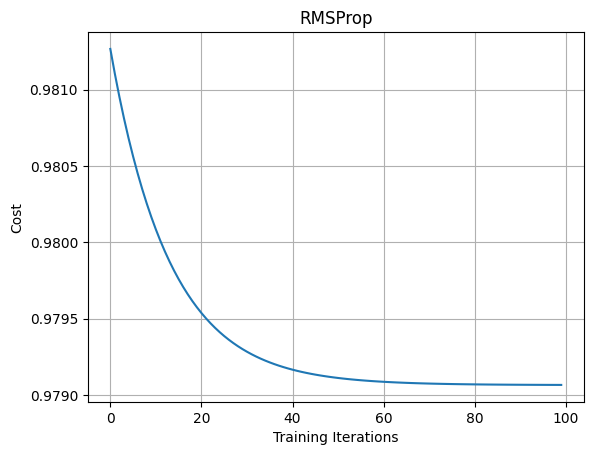

In [34]:
theta = np.zeros(2)
loss = RMSProp(data, theta) 
#Plot the loss:

plt.plot(loss)
plt.grid()
plt.title('RMSProp')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

# ADAM

In [35]:
def Adam(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6, num_iterations = 1000):
   
    loss = []
    
    #initialize first moment mt
    mt = np.zeros(theta.shape[0])
    
    #initialize second moment vt
    vt = np.zeros(theta.shape[0])
    
    for t in range(num_iterations):
        
        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)
        
        #update first moment mt as given in equation (19)
        mt = beta1 * mt + (1. - beta1) * gradients
        
        #update second moment vt as given in equation (20)
        vt = beta2 * vt + (1. - beta2) * gradients ** 2
        
        #compute bias-corected estimate of mt (21)
        mt_hat = mt / (1. - beta1 ** (t+1))
        
        #compute bias-corrected estimate of vt (22)
        vt_hat = vt / (1. - beta2 ** (t+1))
        
        #update the model parameter as given in (23)
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
      
        loss.append(loss_function(data,theta))

    return loss

Text(0, 0.5, 'Cost')

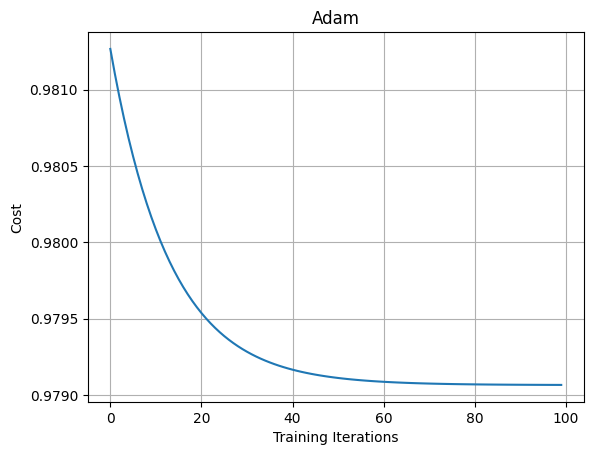

In [36]:
theta = np.zeros(2)
loss = RMSProp(data, theta) 
# Plot the loss:

plt.plot(loss)
plt.grid()
plt.title('Adam')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

# ADAMAX

In [ ]:
def Adamax(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6, num_iterations = 500):
    
    loss = []
    
    #initialize first moment mt
    mt = np.zeros(theta.shape[0])
    
    #initialize second moment vt
    vt = np.zeros(theta.shape[0])
    
    for t in range(num_iterations):
        
        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)
        
        #compute first moment mt as given in equation (24)
        mt = beta1 * mt + (1. - beta1) * gradients
        
        #compute second moment vt as given in equation (25)
        vt = np.maximum(beta2 * vt, np.abs(gradients))
        
        #compute bias-corrected estimate of mt as given in equation (26)
        mt_hat = mt / (1. - beta1 ** (t+1))
        
        #update theta as give in equation (27)
        theta = theta - ((lr / (vt + epsilon)) * mt_hat)
        
        #store the loss
        loss.append(loss_function(data,theta))

    return loss

# AMSGRAD

In [37]:
def AMSGrad(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6, num_iterations = 50):
    
    loss = []
    
    #initialize first moment mt
    mt = np.zeros(theta.shape[0])
    
    #initialize second moment vt
    vt = np.zeros(theta.shape[0])
    
    #initialize vt_hat
    vt_hat = np.zeros(theta.shape[0])
    
    for t in range(num_iterations):
        
        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)
        
        #compute first moment as given in equation (28)
        mt = beta1 * mt + (1. - beta1) * gradients
        
        #compute second moment as given in equation (29)
        vt = beta2 * vt + (1. - beta2) * gradients ** 2
        
        #compute vt_hat as given in equation (30)
        vt_hat = np.maximum(vt_hat,vt)
        
        #compute bias-corrected estimate of mt as shown in equation (31)
        mt_hat = mt / (1. - beta1 ** (t+1))
        
        #update model parameter theta as given in (32)
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat

        #store loss
        loss.append(loss_function(data,theta))

    return loss

Text(0, 0.5, 'Cost')

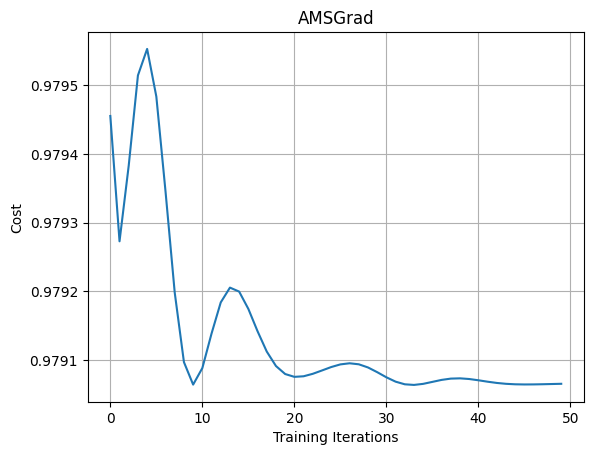

In [38]:
theta = np.zeros(2)
loss = AMSGrad(data, theta) 
#Plot the loss:

plt.plot(loss)
plt.grid()
plt.title('AMSGrad')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

# NADAM

In [39]:
def Nadam(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6, num_iterations = 50):
   
    loss = []
    
    #initialize first moment mt
    mt = np.zeros(theta.shape[0])
    
    #initialize second moment vt
    vt = np.zeros(theta.shape[0])
    beta_prod = 1
    
    for t in range(num_iterations):
        
        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)
        
        #compute first moment as given in equation (33)
        mt = beta1 * mt + (1. - beta1) * gradients
        
        #compute second moment as given in equation (34)
        vt = beta2 * vt + (1. - beta2) * gradients ** 2
        beta_prod = beta_prod * (beta1)
        
        #compute bias-corrected estimates of mt as shown in (35)
        mt_hat = mt / (1. - beta_prod)
        
        #compute bias-corrected estimate of gt as shown in (36)
        g_hat = gradients / (1. - beta_prod)
        
        #compute bias-corrected estimate of vt as shown in (37)
        vt_hat = vt / (1. - beta2 ** (t))
        
        #compute mt tilde as shown in (38)
        mt_tilde = (1-beta1**t+1) * mt_hat + ((beta1**t)* g_hat)
        
        #update theta as given in (39)
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
        
        #store the loss
        loss.append(loss_function(data,theta))

    return loss

Text(0, 0.5, 'Cost')

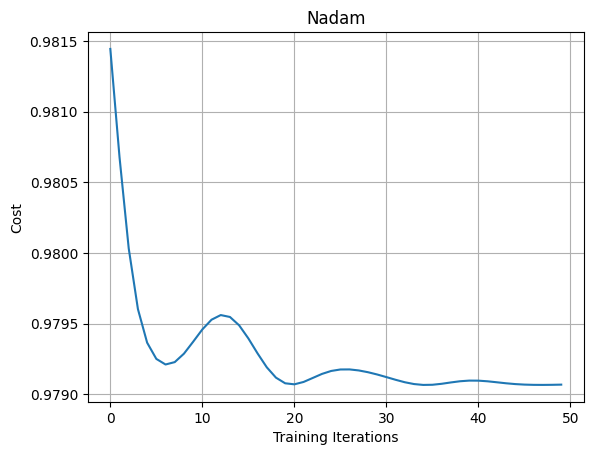

In [40]:
theta = np.zeros(2)
loss = Nadam(data, theta) 
# Plot the loss:

plt.plot(loss)
plt.grid()
plt.title('Nadam')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')